# Info and sources

## Contributors

* Mario D'Amore
* ...


## Objectives

* TBA

## Background

TBA

## Requirements

* TBA

## Data sources

TBA


## Planetary Geology book 

* Related to Chapters: 3, TBA



In [1]:
# %load https://gist.githubusercontent.com/kidpixo/2ec078d09834b5aa7869/raw/c8812811211dc7cd62f5b530b51b0104f39263ff/ipython%20inizialization
# import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import sys
import os
import urllib

## Thermal Emission Spectrometer Data

First we check if the ch03-exploration-tools/data directory exist, if not we create it.

The

[thermalemissionspectrometer](http://tes.asu.edu/products/index.html)

In [3]:
data_dir = os.getcwd()+os.sep +"data"+ os.sep 
data_dir_rel = "~"+os.sep +"data"+ os.sep 

try: 
    os.makedirs(data_dir)
except OSError:
    if not os.path.isdir(data_dir):
        raise

In [4]:
rem_file = [ 
#     "http://nssdc.gsfc.nasa.gov/image/planetary/mars/marsglobe1.jpg", # test file
#     "http://www.bbc.co.uk/doctorwho/medialibrary/images/misc/logos/new_logo_1024.jpg", # test file
    "http://tes.asu.edu/mineral_map/TES_surface_emissivity_1_ppd.envi",
    "http://tes.asu.edu/mineral_map/TES_surface_emissivity_1_ppd.envi.hdr",
    "http://tes.asu.edu/mineral_map/TES_emissivity_spectral_shapes.ascii"]

In [5]:
def dlProgress(count, blockSize, totalSize):
    # protect the indicator for file with totalSize smaller than blockSize.
    if blockSize < totalSize:
        percent = int(count*blockSize*100/totalSize)
    else:
        percent = 100
#     sys.stdout.write("\n%s %s %s %s" % (count, blockSize, totalSize, percent)) # debugging
    sys.stdout.write("\r[" + os.path.basename(act_file) + "][%d%%][%s>%s]" % (percent,'-'*(percent/10),' '*(10-percent/10)))
    sys.stdout.flush()

In [6]:
for act_file in rem_file:
    act_filepath = data_dir+os.path.basename(act_file)
    act_filepath_rel = data_dir_rel+os.path.basename(act_file)
    print act_file
    if os.path.isfile(act_filepath) and os.access(act_filepath, os.R_OK):
        print "File exists and is readable :\n ",act_filepath_rel
    else:
        print "File doesn't exists or is not readable, downloading to: \n"+act_filepath_rel
        urllib.urlretrieve(act_file, act_filepath, reporthook=dlProgress)
    print

http://tes.asu.edu/mineral_map/TES_surface_emissivity_1_ppd.envi
File exists and is readable :
  ~/data/TES_surface_emissivity_1_ppd.envi

http://tes.asu.edu/mineral_map/TES_surface_emissivity_1_ppd.envi.hdr
File exists and is readable :
  ~/data/TES_surface_emissivity_1_ppd.envi.hdr

http://tes.asu.edu/mineral_map/TES_emissivity_spectral_shapes.ascii
File exists and is readable :
  ~/data/TES_emissivity_spectral_shapes.ascii



In [7]:
# good tip, see http://stackoverflow.com/a/12900982/1435167
emissivity_spectral_shapes = np.genfromtxt('data/TES_emissivity_spectral_shapes.ascii', names=True)
wavelength = emissivity_spectral_shapes['TES_samples_935_65110'] # first column
emissivity_spectral_shapes.dtype

dtype([('TES_samples_935_65110', '<f8'), ('Acidalia_Type_Surface', '<f8'), ('Syrtis_Type_Surface', '<f8'), ('Hematite_TT_derived', '<f8'), ('Dust_Low_CO2', '<f8'), ('Dust_High_CO2', '<f8'), ('Water_Ice_Cloud_High_Latitude', '<f8'), ('Water_Ice_Cloud_Low_Latitude', '<f8')])

In [8]:
import spectral

In [9]:
img = spectral.io.envi .open('data/TES_surface_emissivity_1_ppd.envi.hdr')

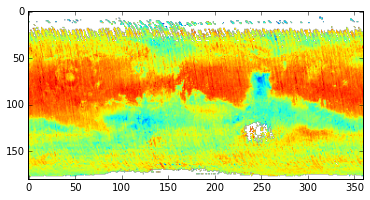

In [10]:
plt.figure(figsize=[6,3])
plt.imshow(np.ma.masked_equal(img.read_band(40),0),interpolation="bilinear")

In [11]:
pc =  spectral.principal_components(img)

Covariance.....  0.0%Covariance.....  0.0%Covariance.....  1.0%Covariance.....  2.0%Covariance.....  3.0%Covariance.....  4.0%Covariance.....  5.0%Covariance.....  6.0%Covariance.....  7.0%Covariance.....  8.0%Covariance.....  9.0%Covariance..... 10.0%Covariance..... 11.0%Covariance..... 12.0%Covariance..... 13.0%Covariance..... 14.0%Covariance..... 15.0%Covariance..... 16.0%Covariance..... 17.0%Covariance..... 18.0%Covariance..... 19.0%Covariance..... 20.0%Covariance..... 21.0%Covariance..... 22.0%

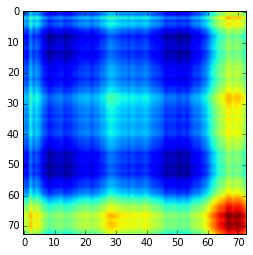

In [12]:
plt.figure(figsize=[4,4])
plt.imshow(pc.cov)

In [13]:
pc_red = pc.reduce(fraction=0.99995)

In [14]:
len(pc_red.eigenvalues)

3

In [15]:
img_pc = pc_red.transform(img)

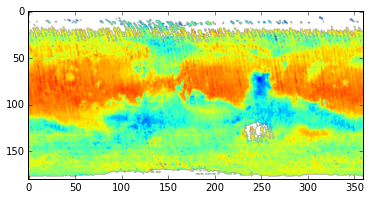

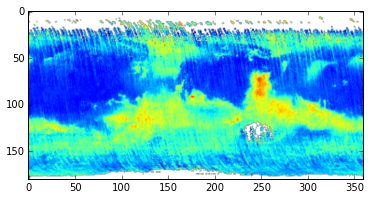

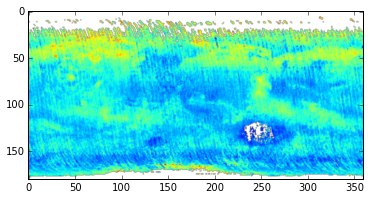

In [17]:
# [0,0,1:2] is the NULL value in original data
plt.figure(figsize=[6,3])
plt.imshow(np.ma.masked_equal(img_pc[:,:,0:1],img_pc[0,0,0:1]),interpolation="bicubic");
plt.figure(figsize=[6,3])
plt.imshow(np.ma.masked_equal(img_pc[:,:,1:2],img_pc[0,0,1:2]),interpolation="bicubic");
plt.figure(figsize=[6,3])
plt.imshow(np.ma.masked_equal(img_pc[:,:,2:3],img_pc[0,0,2:3]),interpolation="bicubic");

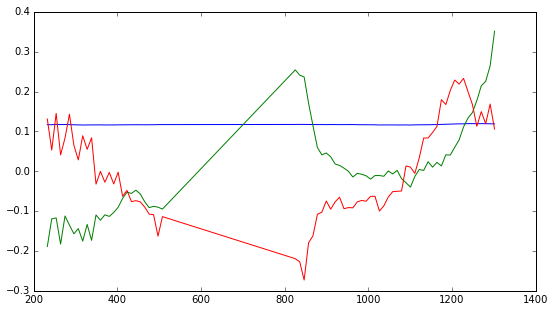

In [51]:
plt.figure(figsize=[9,5])
plt.plot(wavelength,pc_red.eigenvectors[:,0:1]) # average
plt.plot(wavelength,pc_red.eigenvectors[:,1:2])
plt.plot(wavelength,pc_red.eigenvectors[:,2:3])

In [11]:
# read all the image in numpy array
npimg = img.read_band(np.arange(img.nbands))
bands, rows, cols = npimg.shape
npimg_data = np.reshape(npimg,(73, 180*360))

In [14]:
from sklearn.decomposition import PCA, KernelPCA, RandomizedPCA

In [39]:
pca = PCA()
X_pca = pca.fit_transform(npimg_data)

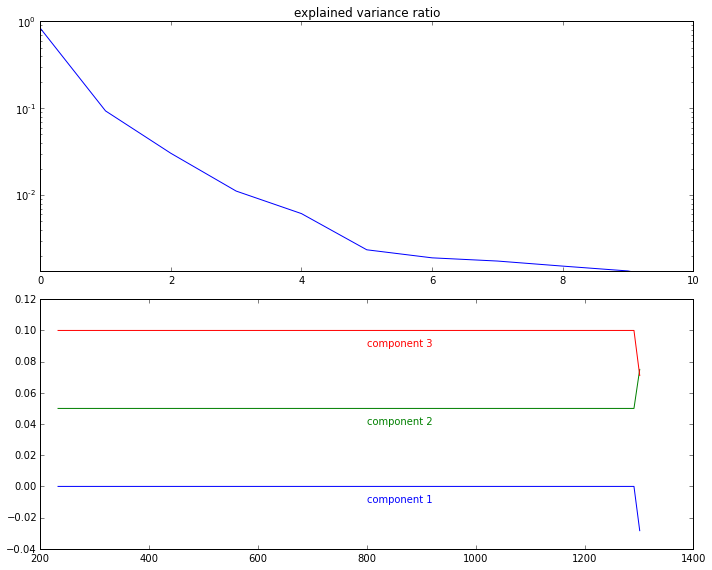

In [110]:
# Plot results
fig = plt.figure(figsize=(10,8), facecolor='white')
# ax = plt.subplot(111)

ax = plt.subplot2grid((2,1), (0,0), colspan=2)

ax.plot(pca.explained_variance_ratio_)
ax.set_title('explained variance ratio')
n_comp = 10
ax.set_xlim([0,n_comp])
ax.set_yscale('log', nonposy='clip')
ax.set_ylim([pca.explained_variance_ratio_[0:n_comp].min(),1]);

ax2 = plt.subplot2grid((2,1), (1,0))

for i in range(3):
         l = plt.plot(wavelength, pca.components_[:,i]+ 0.05 * i)
         c = l[0].get_color()
         plt.text(800, -0.01 + 0.05 * i, "component %i" % (i + 1), color=c)

plt.tight_layout()

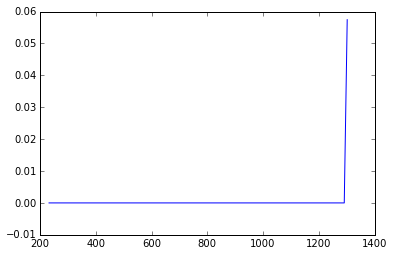

In [114]:
plt.plot(wavelength, pca.components_[:,3])

In [20]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(npimg_data)
X_back = kpca.inverse_transform(X_kpca)

In [17]:
rpca = RandomizedPCA(n_components=4, random_state=0)
X_pca = rpca.fit_transform(npimg_data)
X_back = rpca.transform(npimg_data)

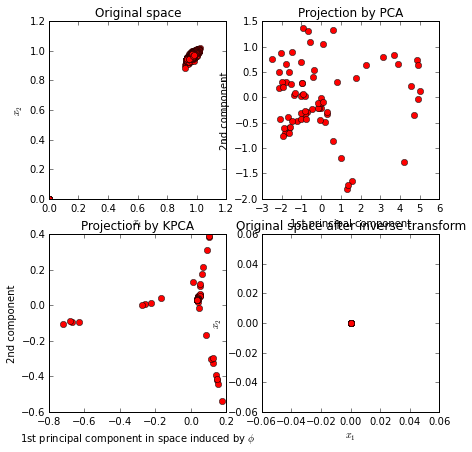

In [21]:
# Plot results
plt.figure(figsize=[7,7])

plt.subplot(2, 2, 1)
plt.title("Original space")

plt.plot(npimg_data[25,:],npimg_data[45,:], "ro")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(2, 2, 2)
plt.plot(X_pca[:, 0], X_pca[:, 1],'ro')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3)
plt.plot(X_kpca[:, 0], X_kpca[:, 1],'ro')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4)
plt.plot(X_back[:, 0], X_back[:, 1], "ro")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


In [26]:
from sklearn.decomposition import FastICA

In [27]:
ica = FastICA()
S_ica_ = ica.fit(npimg_data.T).transform(npimg_data.T)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/decomposition/fastica_.py:117: UserWarning: FastICA did not converge. You might want to increase the number of iterations.
  ' to increase the number of iterations.')


In [28]:
def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', linewidths=0, zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color=color)


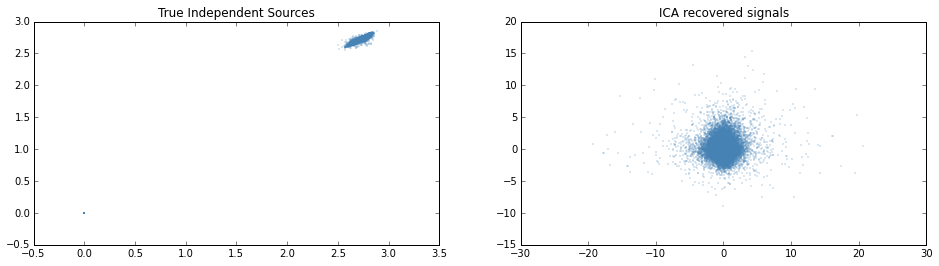

In [29]:
plt.figure(figsize=[16,4])
plt.subplot(1, 2, 1)
plot_samples(npimg_data.T / np.std(npimg_data.T))
plt.title('True Independent Sources')
plt.subplot(1, 2, 2)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

<matplotlib.colorbar.Colorbar instance at 0x1113407a0>

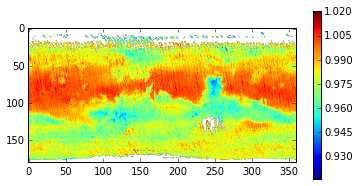

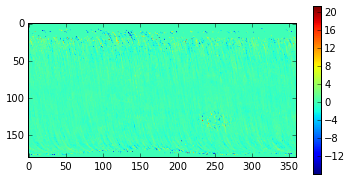

In [30]:
plt.figure(figsize=[6,3])
plt.imshow(np.ma.masked_equal(
         np.reshape(npimg_data,(bands, rows, cols))[40,:,:]
        ,0),interpolation="bilinear")
plt.colorbar()
plt.figure(figsize=[6,3])
plt.imshow(np.ma.masked_equal(
         np.reshape(S_ica_.T/ np.std(S_ica_.T),(bands, rows, cols))[40,:,:]
        ,0),interpolation="bilinear")
plt.colorbar()

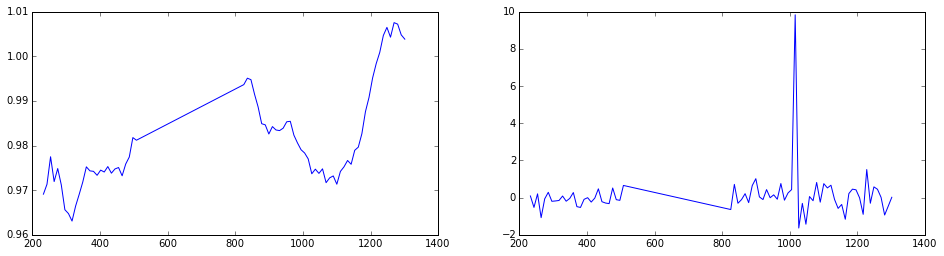

In [115]:
plt.figure(figsize=[16,4])
plt.subplot(1, 2, 1)
plt.plot(wavelength,npimg[:,90,180])
plt.subplot(1, 2, 2)
plt.plot(wavelength,np.reshape(S_ica_.T/ np.std(S_ica_.T),(bands, rows, cols))[:,90,180])